In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("datasets//avisassurance_train.csv", encoding="utf-8", sep = ";")
train

,date,note,auteur,avis,assureur,produit
0,06 septem...,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto
1,03 mai 20...,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto
2,21 mars 2...,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto
3,10 juin 2...,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto
4,29 janvie...,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto
...,...,...,...,...,...,...
24100,22 mars 2...,1,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto
24101,06 décemb...,1,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation
24102,14 avril ...,1,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante
24103,11 juille...,3,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto


In [4]:
test = pd.read_csv("datasets//avisassurance_test.csv", encoding="utf-8", sep = ";")
test

,date,auteur,avis,assureur,produit
0,16 novemb...,lognos-d-139728,Satisfait des tarif et rapide j'attends de voi...,L'olivier Assurance,auto
1,16 novemb...,paugam-l-139727,"Bon service, service réactif. Tout en ligne pr...",L'olivier Assurance,auto
2,16 novemb...,rozgonyi-o-139704,L’assurance Olivier est une très bonne assuran...,L'olivier Assurance,auto
3,16 novemb...,saad-hellal-h-139697,Je suis satisfait de l'olivier assurances pas ...,L'olivier Assurance,auto
4,15 novemb...,damis-s-139693,le prix est attractif par rapport à ma situati...,L'olivier Assurance,auto
...,...,...,...,...,...
10327,24 août 2...,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale
10328,18 mai 20...,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles
10329,08 avril ...,victor-109599,"Suite a un cambriolage le 22/01/2021, je suis ...",Allianz,assurances-professionnelles
10330,19 avril ...,lkio-110907,"Bonjour,\r\n\r\nJe constate qu'entre le moment...",Generali,assurances-professionnelles


## Data Exploratory / Cleaning

##### Checking NaN values

In [5]:
train[train.isnull().any(axis=1)]

,date,note,auteur,avis,assureur,produit
802,23 novemb...,2,durocherdesducs-49489,NaN,GMF,auto
16218,27 novemb...,3,NaN,Intervention supprimée à la demande de l'inter...,Intériale,prevoyance


In [6]:
test[test.isnull().any(axis=1)]

,date,auteur,avis,assureur,produit
4863,28 novemb...,fredo-49657,NaN,Pacifica,auto


##### Removing rows with no 'avis'

In [7]:
train = train[train['avis'].notna()]
test = test[test['avis'].notna()]

In [8]:
train['note'].describe()

count    24104.000000
mean         2.847619
std          1.531390
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: note, dtype: float64

Count distincts per columns

In [9]:
train.nunique()

date         1949
note            5
auteur      23675
avis        24069
assureur       56
produit        13
dtype: int64

On formate pour avoir les dates en type date

In [10]:
train['date_old'] = train['date']
                            

<ipython-input-10-3d47077c6b7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date_old'] = train['date']


In [11]:
train['date'] = train['date'].str.replace(' janvier ', '01')
train['date'] = train['date'].str.replace(' février ', '02')
train['date'] = train['date'].str.replace(' mars ', '03')
train['date'] = train['date'].str.replace(' avril ', '04')
train['date'] = train['date'].str.replace(' mai ', '05')
train['date'] = train['date'].str.replace(' juin ', '06')
train['date'] = train['date'].str.replace(' juillet ', '07')
train['date'] = train['date'].str.replace(' août ', '08')
train['date'] = train['date'].str.replace(' septembre ', '09')
train['date'] = train['date'].str.replace(' octobre ', '10')
train['date'] = train['date'].str.replace(' novembre ', '11')
train['date'] = train['date'].str.replace(' décembre ', '12')
train['date'] = train['date'].str.replace(' ', '')
train['date'] = train['date'].str[:8]
train

<ipython-input-11-5a3fcda33468>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = train['date'].str.replace(' janvier ', '01')
<ipython-input-11-5a3fcda33468>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = train['date'].str.replace(' février ', '02')
<ipython-input-11-5a3fcda33468>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,date,note,auteur,avis,assureur,produit,date_old
0,06092021,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...
1,03052021,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...
2,21032021,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...
3,10062021,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...
4,29012017,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...
...,...,...,...,...,...,...,...
24100,22032021,1,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto,22 mars 2...
24101,06122019,1,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation,06 décemb...
24102,14042021,1,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante,14 avril ...
24103,11072019,3,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto,11 juille...


In [12]:
train['date'] = pd.to_datetime(train['date'], format='%d%m%Y')
train

<ipython-input-12-999d8638e6c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = pd.to_datetime(train['date'], format='%d%m%Y')


,date,note,auteur,avis,assureur,produit,date_old
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...
...,...,...,...,...,...,...,...
24100,2021-03-22,1,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto,22 mars 2...
24101,2019-12-06,1,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation,06 décemb...
24102,2021-04-14,1,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante,14 avril ...
24103,2019-07-11,3,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto,11 juille...


In [13]:
train['année'] = pd.to_datetime(train['date']).dt.year
train['mois'] = pd.to_datetime(train['date']).dt.month
train['jour'] = pd.to_datetime(train['date']).dt.day
train

<ipython-input-13-8d7c366c092c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['année'] = pd.to_datetime(train['date']).dt.year
<ipython-input-13-8d7c366c092c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mois'] = pd.to_datetime(train['date']).dt.month
<ipython-input-13-8d7c366c092c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29
...,...,...,...,...,...,...,...,...,...,...
24100,2021-03-22,1,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto,22 mars 2...,2021,3,22
24101,2019-12-06,1,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation,06 décemb...,2019,12,6
24102,2021-04-14,1,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante,14 avril ...,2021,4,14
24103,2019-07-11,3,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto,11 juille...,2019,7,11


# Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Répartition des notes des avis'}, xlabel='note', ylabel='count'>

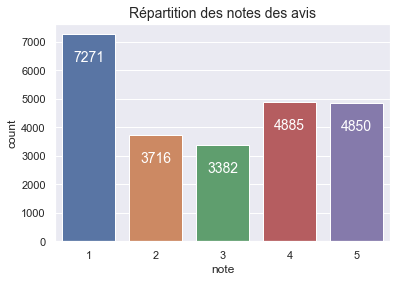

In [15]:
sns.set_theme(style="darkgrid")
countplot_avis = sns.countplot(x = "note", data = train)
countplot_avis.set_title('Répartition des notes des avis', fontsize=14)
# Ajout du count sur la visualisation
for p in countplot_avis.patches:
    countplot_avis.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)
countplot_avis

### Longueur moyenne des avis par note
On ajoute une colonne comptant la longueur des avis

In [16]:
train['avis_length'] = train.avis.str.len()
train

<ipython-input-16-5b4069b93876>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['avis_length'] = train.avis.str.len()


,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720
...,...,...,...,...,...,...,...,...,...,...,...
24100,2021-03-22,1,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto,22 mars 2...,2021,3,22,435
24101,2019-12-06,1,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation,06 décemb...,2019,12,6,207
24102,2021-04-14,1,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante,14 avril ...,2021,4,14,1881
24103,2019-07-11,3,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto,11 juille...,2019,7,11,650


In [17]:
length_per_notes = train.groupby('note', as_index=False)['avis_length'].mean()
length_per_notes

,note,avis_length
0,1,513.071792
1,2,481.220667
2,3,294.404199
3,4,201.488229
4,5,192.407629


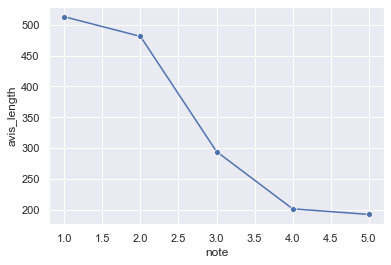

In [18]:
length_per_note_lineplot = sns.lineplot(data = length_per_notes, x = 'note', y = 'avis_length', marker = "o")
sns.set(rc={'figure.figsize':(15,15)})

On voit bien que la taille des avis évoluent significativement en fonction de la note. Ce paramètre peut être intéressant à garder pour la suite de notre étude.

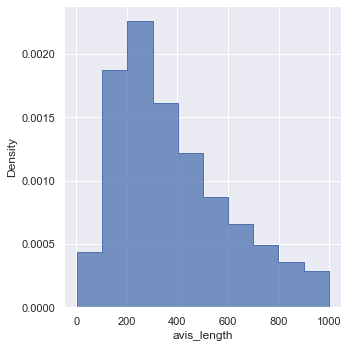

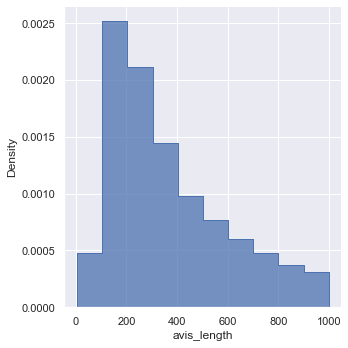

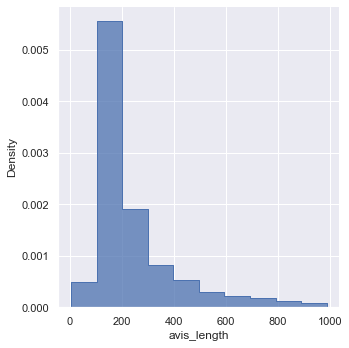

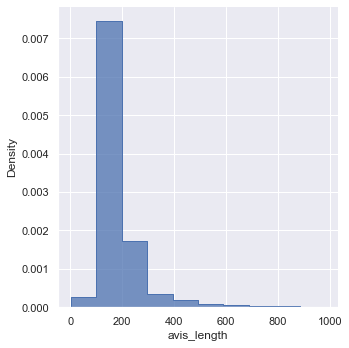

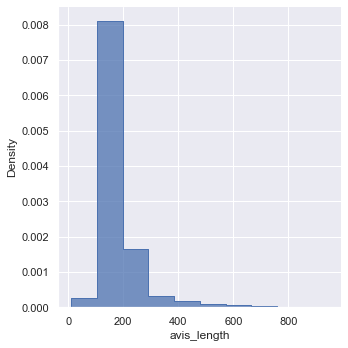

In [51]:
sns.displot(train.loc[(train['note'] == 1) & (train['avis_length'] < 1000)], x = "avis_length", bins = 10, element="step", stat="density")
sns.displot(train.loc[(train['note'] == 2) & (train['avis_length'] < 1000)], x = "avis_length", bins = 10, element="step", stat="density")
sns.displot(train.loc[(train['note'] == 3) & (train['avis_length'] < 1000)], x = "avis_length", bins = 10, element="step", stat="density")
sns.displot(train.loc[(train['note'] == 4) & (train['avis_length'] < 1000)], x = "avis_length", bins = 10, element="step", stat="density")
sns.displot(train.loc[(train['note'] == 5) & (train['avis_length'] < 1000)], x = "avis_length", bins = 10, element="step", stat="density")

Voyons si ce résultat varient beaucoup en fonction des 'produits' que nous avons.

In [21]:
train['produit'].value_counts()

auto                                     14076
sante                                     3525
moto                                      2105
habitation                                1956
prevoyance                                 791
credit                                     653
vie                                        578
animaux                                    374
multirisque-professionnelle                 20
garantie-decennale                          12
assurances-professionnelles                  8
responsabilite-civile-professionnelle        5
flotte-automobile                            1
Name: produit, dtype: int64

In [22]:
top_produit = ['auto',
                'sante',
                'moto',
                'habitation']

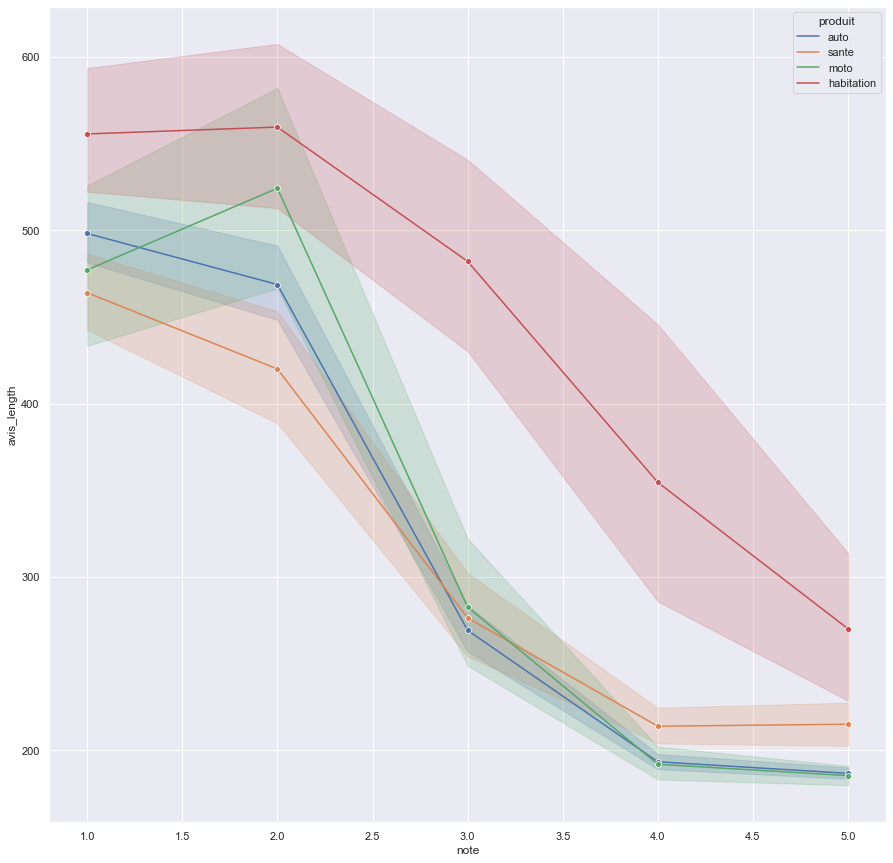

In [23]:
length_per_note_lineplot_produit = sns.lineplot(data = train.loc[train['produit'].isin(top_produit)], x = 'note', y = 'avis_length', hue = 'produit', marker = "o")
sns.set(rc={'figure.figsize':(15,10)})

On remarque tout de suite une différence pour les avis d'habitations.
Faisons la même étude pour les assureurs

In [24]:
train['assureur'].value_counts()

Direct Assurance        5896
L'olivier Assurance     4288
APRIL Moto              1023
GMF                      997
Néoliane Santé           861
MACIF                    829
AMV                      688
Santiane                 658
AXA                      629
MAAF                     612
MAIF                     591
Allianz                  574
Pacifica                 553
Matmut                   474
MGP                      446
Active Assurances        403
Ag2r La Mondiale         350
Harmonie Mutuelle        312
Eurofil                  289
APRIL                    283
Mercer                   267
Cardif                   265
Zen'Up                   245
Cegema Assurances        214
Génération               212
Mgen                     209
CNP Assurances           147
Crédit Mutuel            146
Afer                     144
SwissLife                138
Eca Assurances           132
Generali                 128
Mutuelle des Motards     128
Assur O'Poil             110
Groupama      

In [25]:
top_assureur = ['Direct Assurance',
                "L'olivier Assurance",
                "APRIL Moto",
                "GMF",
                "Néoliane Santé"]

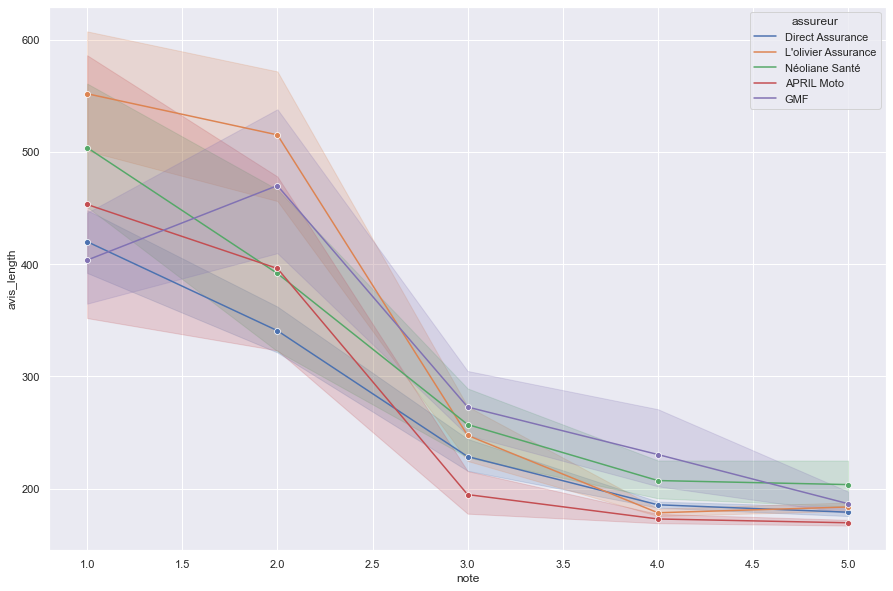

In [26]:
length_per_note_lineplot_assureur = sns.lineplot(data = train.loc[train['assureur'].isin(top_assureur)], x = 'note', y = 'avis_length', hue = 'assureur', marker = "o")
sns.set(rc={'figure.figsize':(15,10)})

Aucune grande différence notable avec les cinq assureurs ayant le plus d'avis.

In [27]:
X_train = train.drop(['note'], axis = 1)
y_train = train['note']
X_train


,date,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length
0,2021-09-06,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156
1,2021-05-03,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267
2,2021-03-21,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167
3,2021-06-10,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155
4,2017-01-29,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720
...,...,...,...,...,...,...,...,...,...,...
24100,2021-03-22,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto,22 mars 2...,2021,3,22,435
24101,2019-12-06,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation,06 décemb...,2019,12,6,207
24102,2021-04-14,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante,14 avril ...,2021,4,14,1881
24103,2019-07-11,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto,11 juille...,2019,7,11,650


Même processus en fonction des années :

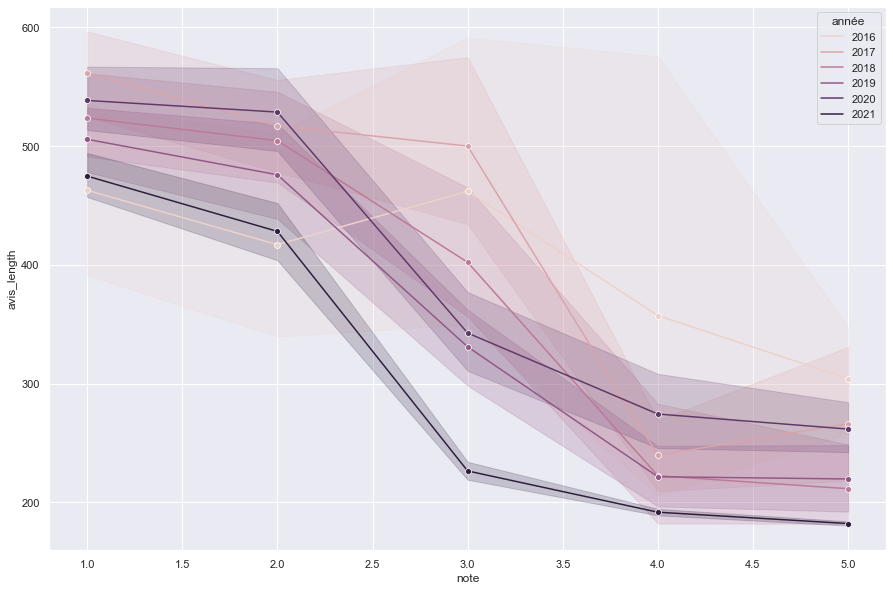

In [28]:
length_per_note_lineplot_année = sns.lineplot(data = train, x = 'note', y = 'avis_length', hue = 'année', marker = "o")
sns.set(rc={'figure.figsize':(15,10)})

<AxesSubplot:title={'center':"Répartition du nombre d'avis par an"}, xlabel='année', ylabel='count'>

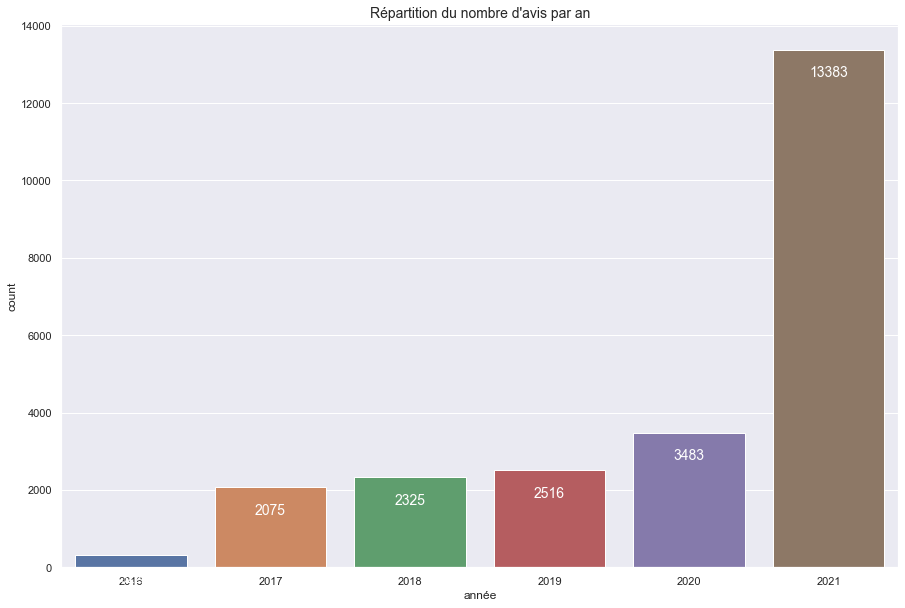

In [29]:
sns.set_theme(style="darkgrid")
countplot_année = sns.countplot(x = "année", data = train)
countplot_année.set_title("Répartition du nombre d'avis par an", fontsize=14)
# Ajout du count sur la visualisation
for p in countplot_année.patches:
    countplot_année.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)
countplot_année

Faisons maintenant une analyse sur les majuscules.
On ajoute une colonne calculant le pourcentage de majuscule dans un avis

In [30]:
train['maj_pourcentage'] = train['avis'].str.findall(r'[A-Z]').str.len()/train['avis'].str.findall(r'[a-zA-Z]').str.len()
train

<ipython-input-30-1d33155e25ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['maj_pourcentage'] = train['avis'].str.findall(r'[A-Z]').str.len()/train['avis'].str.findall(r'[a-zA-Z]').str.len()


,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length,maj_pourcentage
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156,0.016260
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267,0.000000
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167,0.007299
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155,0.008264
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720,0.009042
...,...,...,...,...,...,...,...,...,...,...,...,...
24100,2021-03-22,1,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto,22 mars 2...,2021,3,22,435,0.025316
24101,2019-12-06,1,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation,06 décemb...,2019,12,6,207,0.030675
24102,2021-04-14,1,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante,14 avril ...,2021,4,14,1881,0.054490
24103,2019-07-11,3,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto,11 juille...,2019,7,11,650,0.004016


<Figure size 1080x1080 with 0 Axes>

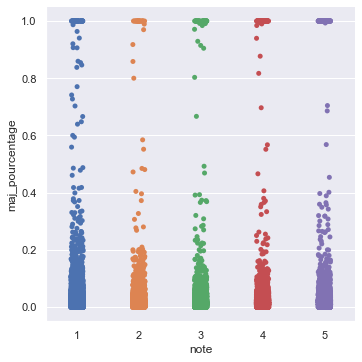

In [31]:
sns.set(rc={'figure.figsize':(15,15)})
plt.figure(figsize = (15,15))
maj_pourcentage_lineplot = sns.catplot(data = train, x = 'note', y = 'maj_pourcentage')

Il est difficile de tirer quelque chose de ce graphique, on remarque cependant que tout le spectre est mieux représenté pour les avis ayant une note de 1.

In [32]:
train['exclam_pourcentage'] = train['avis'].str.findall(r'[!]').str.len()/train['avis'].str.findall(r'[a-zA-Z]').str.len()
train

<ipython-input-32-abeb40cf502a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['exclam_pourcentage'] = train['avis'].str.findall(r'[!]').str.len()/train['avis'].str.findall(r'[a-zA-Z]').str.len()


,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length,maj_pourcentage,exclam_pourcentage
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156,0.016260,0.000000
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267,0.000000,0.000000
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167,0.007299,0.000000
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155,0.008264,0.000000
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720,0.009042,0.009042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24100,2021-03-22,1,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto,22 mars 2...,2021,3,22,435,0.025316,0.009494
24101,2019-12-06,1,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation,06 décemb...,2019,12,6,207,0.030675,0.000000
24102,2021-04-14,1,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante,14 avril ...,2021,4,14,1881,0.054490,0.001535
24103,2019-07-11,3,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto,11 juille...,2019,7,11,650,0.004016,0.000000


In [33]:
import string
def max_maj_in_a_row(row):
    avis = row['avis']   
    #On enlève les espaces
    avis = avis.replace(' ', '')
    #On enlève la punctuation
    avis = avis.translate(str.maketrans('', '', string.punctuation))

    max_maj = 0
    maj_in_a_row = 0
    for char in avis:
        if char.isupper():
            maj_in_a_row = maj_in_a_row + 1
        else : maj_in_a_row = 0
        if maj_in_a_row > max_maj:
            max_maj = maj_in_a_row
    return max_maj

In [34]:
train['max_maj_in_a_row'] = train.apply(lambda row: max_maj_in_a_row(row), axis = 1)
train

<ipython-input-34-c43b995b9169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['max_maj_in_a_row'] = train.apply(lambda row: max_maj_in_a_row(row), axis = 1)


,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length,maj_pourcentage,exclam_pourcentage,max_maj_in_a_row
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156,0.016260,0.000000,1
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267,0.000000,0.000000,0
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167,0.007299,0.000000,1
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155,0.008264,0.000000,1
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720,0.009042,0.009042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24100,2021-03-22,1,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto,22 mars 2...,2021,3,22,435,0.025316,0.009494,5
24101,2019-12-06,1,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation,06 décemb...,2019,12,6,207,0.030675,0.000000,2
24102,2021-04-14,1,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante,14 avril ...,2021,4,14,1881,0.054490,0.001535,10
24103,2019-07-11,3,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto,11 juille...,2019,7,11,650,0.004016,0.000000,1


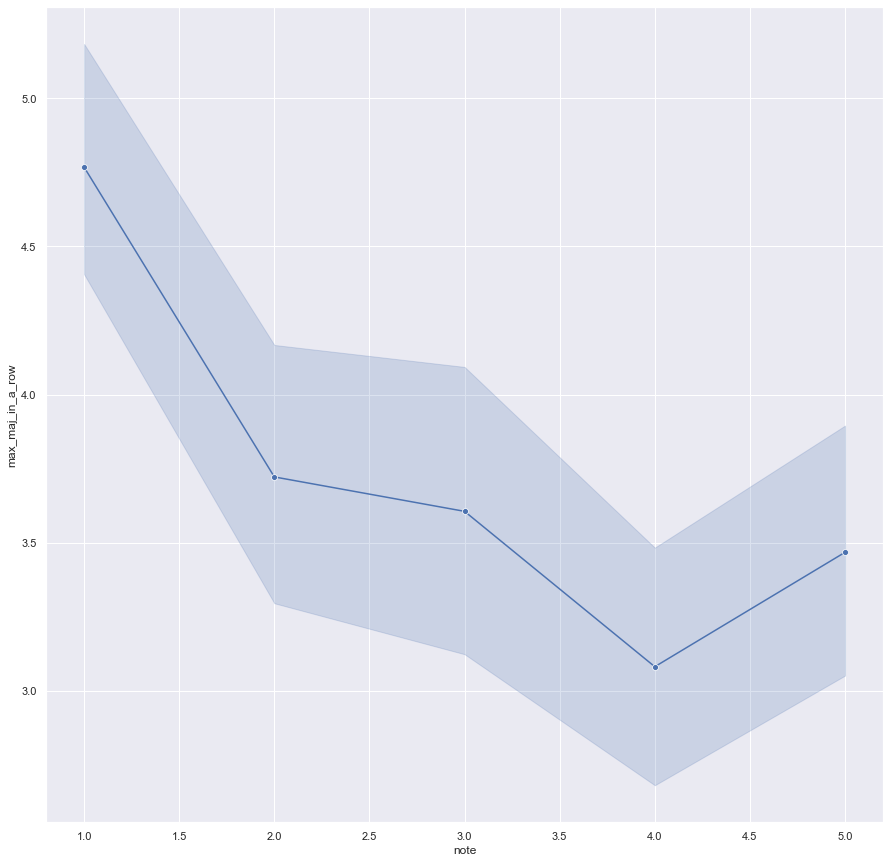

In [35]:
sns.set(rc={'figure.figsize':(15,15)})
plt.figure(figsize = (15,15))
maj_pourcentage_lineplot = sns.lineplot(data = train, x = 'note', y = 'max_maj_in_a_row', marker = 'o')

Comme l'on pouvait s'y attendre, il y a plus de majuscules de suite en moyenne dans les mauvais commentaires

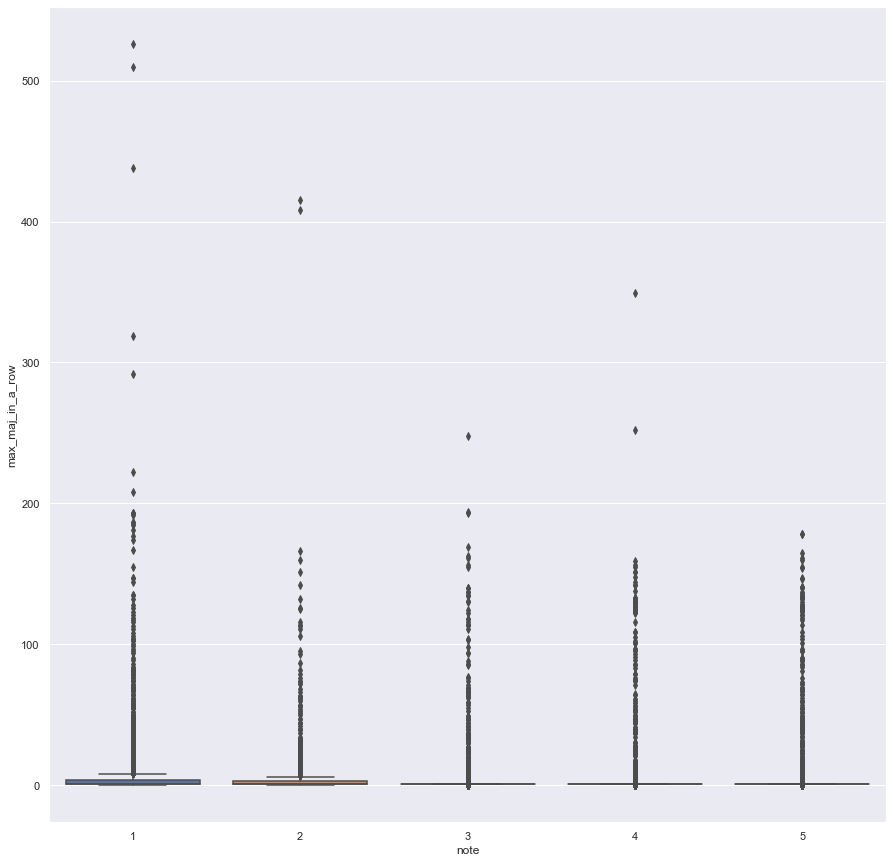

In [36]:
maj_pourcentage_lineplot = sns.boxplot(data = train, x = 'note', y = 'max_maj_in_a_row')

Je cache les outliers parce qu'on voit rien sinon.

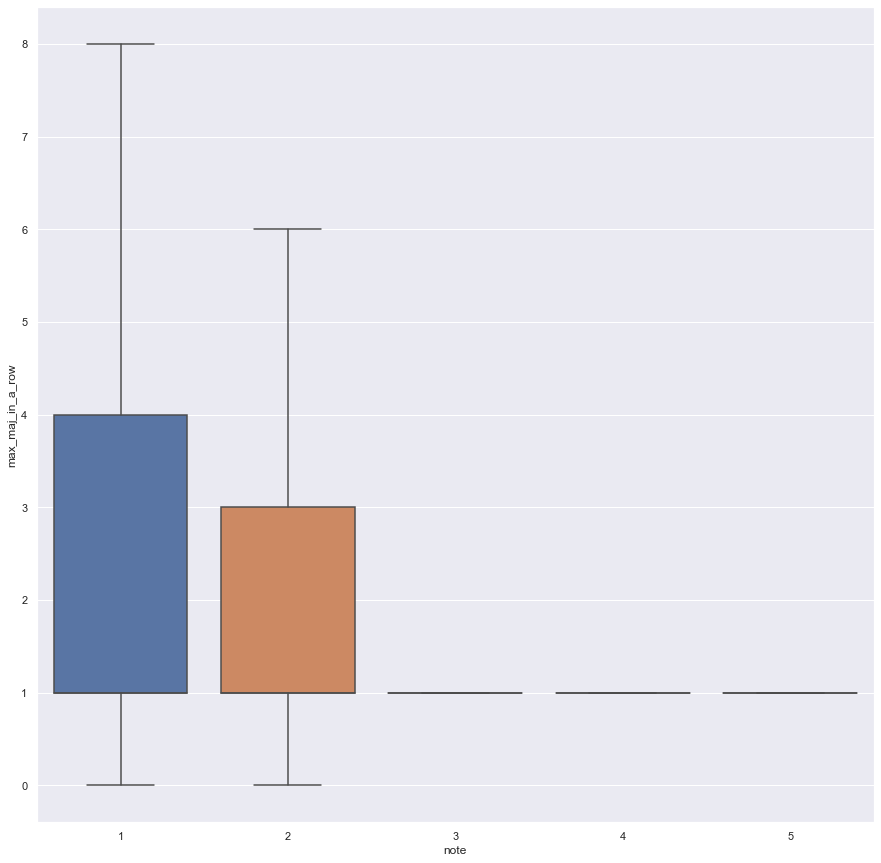

In [37]:
maj_pourcentage_lineplot = sns.boxplot(data = train, x = 'note', y = 'max_maj_in_a_row', showfliers=False)

In [38]:
train.groupby(['note'])['max_maj_in_a_row'].describe()

,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
1,7271.0,4.767570,17.117706,0.0,1.0,1.0,4.0,526.0
2,3716.0,3.722551,13.792257,0.0,1.0,1.0,3.0,415.0
3,3382.0,3.606446,14.635927,0.0,1.0,1.0,1.0,248.0
4,4885.0,3.082293,14.436359,0.0,1.0,1.0,1.0,349.0
5,4850.0,3.468247,14.828862,0.0,1.0,1.0,1.0,178.0


In [39]:
import string
def max_exclam_in_a_row(row):
    avis = row['avis']   
    #On enlève les espaces
    avis = avis.replace(' ', '')

    max_exclam = 0
    exclam_in_a_row = 0
    for char in avis:
        if char == '!':
            exclam_in_a_row = exclam_in_a_row + 1
        else : exclam_in_a_row = 0
        if exclam_in_a_row > max_exclam:
            max_exclam = exclam_in_a_row
    return max_exclam

train['max_exclam_in_a_row'] = train.apply(lambda row: max_exclam_in_a_row(row), axis = 1)
train

<ipython-input-39-66ddb773a9e3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['max_exclam_in_a_row'] = train.apply(lambda row: max_exclam_in_a_row(row), axis = 1)


,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length,maj_pourcentage,exclam_pourcentage,max_maj_in_a_row,max_exclam_in_a_row
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156,0.016260,0.000000,1,0
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267,0.000000,0.000000,0,0
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167,0.007299,0.000000,1,0
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155,0.008264,0.000000,1,0
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720,0.009042,0.009042,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24100,2021-03-22,1,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto,22 mars 2...,2021,3,22,435,0.025316,0.009494,5,1
24101,2019-12-06,1,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation,06 décemb...,2019,12,6,207,0.030675,0.000000,2,0
24102,2021-04-14,1,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante,14 avril ...,2021,4,14,1881,0.054490,0.001535,10,1
24103,2019-07-11,3,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto,11 juille...,2019,7,11,650,0.004016,0.000000,1,0


In [40]:
def info_avis(num):
    return train['avis'][num] + "\n" + str(train['note'][num])

In [41]:
y_list = list(range(11000,11005))
for y in y_list:
    print(train['avis'][y] + "\nNote : " + str(train['note'][y]))

La digitalisation de la procédure de la souscription est une satisfaction totale. Le prix est vraiment accessible voire acceptable pour les garanties souscrites Merci
Note : 4
Ne savent même pas défendre un conducteur quand il n'est pas en tort. Témoins qui atteste que c'est la voiture qui a fait un écart sur moi. Et la complémentaire remboursement équipement c'est de la M..... Un casque de 2 mais rembourser à seulement 45% de sa valeur.

Une HONTE DE SE DIRE LA MUTUELLE DES MOTARDS
Note : 1
Bonjour,
Je trouve extrêmement frustrant, le fait que malgré mon bonus et ma deuxième année consécutive chez vous, le prix de mon assurance auto soit rester le même que l'an dernier.
J'envisage de prospecter la concurrence.. 
Note : 2
Les prélèvements se passent à merveille, les conditions commerciales varient en fonction du changement du francisé. Un sans franchise racheté en cas de sinistre responsable, quelque soit le nombre de sinistres, aujourd'hui c'est au bon vouloir du franchisé. Plus confi

On souhaite maintenant remplacer tous les espaces multiples en un simple espace, pareil pour la ponctuation. Et forcer toutes les lettres à être en minuscules.

In [42]:
train['avis'] = train['avis'].str.replace('.', ' ')
train['avis'] = train['avis'].str.replace(',', ' ')
train['avis'] = train['avis'].str.replace(':', ' ')
train['avis'] = train['avis'].str.replace(';', ' ')
train['avis'] = train['avis'].str.replace('?', ' ')
train['avis'] = train['avis'].str.replace('!', ' ')
train['avis'] = train['avis'].str.replace('\s{2,}', ' ')

<ipython-input-42-151ff8478f62>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  train['avis'] = train['avis'].str.replace('.', ' ')
<ipython-input-42-151ff8478f62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['avis'] = train['avis'].str.replace('.', ' ')
<ipython-input-42-151ff8478f62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['a

In [43]:
train['avis'][10]

"c'est une honte totale nous avons toutes nos assurances avec allianz ils traitent notre réclamation avec incompétence nous menaçons de les quitter ils annulent néanmoins notre assurance à la fin de ce contrat éviter "

Réussir à comprendre comment lemmatizer les mots en français avec Spacy, ça devrait être possible (https://github.com/sammous/spacy-lefff)

In [44]:
import spacy
from spacy_lefff import LefffLemmatizer
from spacy.language import Language

@Language.factory('french_lemmatizer')
def create_french_lemmatizer(nlp, name):
    return LefffLemmatizer()

nlp = spacy.load('fr_core_news_sm')
nlp.add_pipe('french_lemmatizer', name='lefff')

In [45]:
avis_lem = nlp(train['avis'][10])
for word in avis_lem:
    print(word.lemma_)

ce
être
un
honte
total
nous
avoir
tout
notre
assurance
avec
allianz
il
traiter
notre
réclamation
avec
incompétence
nous
menacer
de
le
quitter
il
annuler
néanmoins
notre
assurance
à
le
fin
de
ce
contrat
éviter


In [46]:
def get_lemma_avis(row):
    avis_temp = row['avis']
    avis_temp = nlp(avis_temp)
    avis = ""
    for word in avis_temp:
        avis = avis + " " + str(word.lemma_)
    return avis

In [47]:
train['avis'] = train.apply(lambda row: get_lemma_avis(row), axis = 1)
train['avis'][10]

KeyboardInterrupt: 

In [ ]:
print(info_avis(958))

 suite à le ajout de un box de parking privatif sur mon contrat de assurance habitation je avoir appeler le maif afin de le informer de changement ce changement n' être en général matérialiser que par un simple avener ne modifier pas ou quasiment pas le prime de assurance quell agréable surprise de découvrir que le formule minimum ( primordial ) que je avoir jusque alors souscrite ne permettre pas de assurer un simple box de parking impossible de obtenir le moindre information constructif au téléphone si ce n' être en résumé " ce être comme cela " je n' avoir pas trouver le information exclure le assurance de box dans le condition général de contrat et le conseiller n' avoir pas être capable de me énoncer clairement le texte aller dans ce sens me voilà donc obliger de souscrir le assurance de un niveau supérieur faire flamber mon prime de assurance annuel de plus de 90 euro pour un box de 12m2
1


On enlève les stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
stop = stopwords.words('french')
# stop.append('cela')
# stop.append('autre')
# stop.append('donc')
# stop.append('chez')
# stop.append('n')
train['avis'] = train['avis'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train['avis'][10]

<ipython-input-47-87357f57bef9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['avis'] = train['avis'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


'être honte total avoir tout assurance allianz traiter réclamation incompétence menacer quitter annuler néanmoins assurance fin contrat éviter'

Encode avec un TF-IDF ou un BOW puis tester les différents modèles
Trying a LightGBM

TF_IDF

In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    words = tokeniser.tokenize(text)
    return words

In [ ]:
# Create an instance of TfidfVectorizer
vectoriser = TfidfVectorizer(analyzer=preprocess_text)

# Fit to the data and transform to feature matrix
avis_vectorised = vectoriser.fit_transform(train['avis'])

# Convert sparse matrix to dataframe
avis_vectorised = pd.DataFrame.sparse.from_spmatrix(avis_vectorised)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
# Rename each column using the mapping
for col in avis_vectorised.columns:
    avis_vectorised.rename(columns={col: col_map[col]+ '_word'}, inplace=True)
avis_vectorised


,0_word,00_word,000_word,0000_word,00000_word,0000000000_word,0000007599607304_word,0000009154533473_word,0001_word,000e_word,...,ôter_word,ôté_word,ö_word,ùme_word,ùoin_word,ûn_word,œil_word,œuf_word,œuvre_word,œuvrer_word
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24100,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24101,0.0,0.073167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24102,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


On concat avec ce qu'on avait avant

In [ ]:
train = pd.concat([train, avis_vectorised], axis=1).reindex(train.index)

On drop les colonnes qui nous intéresse pas et on get_dummies les colonnes à catégories, puis on export le dataframe en csv pour appliquer nos modèles de ML

In [ ]:
columns_to_encode = ['assureur', 'produit']
columns_to_delete = ['avis','date','auteur','date_old','année','mois','jour']

for column in columns_to_delete:
    train = train.drop([column], axis = 1)
train = pd.get_dummies(train, columns=columns_to_encode)

#On substract 1 aux labels pour avoir des values entre 0 et 4
train['note'] = train.note.sub(1)

train['note'] = train['note'].astype(int)

In [ ]:
train.to_pickle('train_processed.pkl')